In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_excel('datatest.xlsx')
dataset.head(11)

,nama,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,97,96,95,1,2
1,Matematika,85,79,72,2,1
2,Sastra Inggris,70,80,85,1,2
3,Matematika,81,83,80,1,1
4,Sastra Inggris,97,76,82,2,2
5,Matematika,90,85,82,1,2
6,Sastra Indonesia,87,83,93,2,1
7,Sastra Indonesia,84,81,89,2,1
8,Sastra Inggris,80,89,84,1,2
9,Sastra Inggris,86,87,83,1,2


In [3]:
x = dataset.iloc [:, [2,3]].values
y = dataset.iloc [:, -1 ].values
print(x)
print(y)

[[96 95]
 [79 72]
 [80 85]
 [83 80]
 [76 82]
 [85 82]
 [83 93]
 [81 89]
 [89 84]
 [87 83]
 [86 87]]
[2 1 2 1 2 2 1 1 2 2 1]


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train)
len(x_train)
len(x)
len(x_test)
len(y)
len(y_test)
len(y_train)

[[86 87]
 [83 93]
 [79 72]
 [81 89]
 [89 84]
 [83 80]
 [96 95]
 [85 82]]


8

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 0.15094638  0.25144742]
 [-0.45283914  1.11355287]
 [-1.25788651 -1.9038162 ]
 [-0.85536283  0.53881591]
 [ 0.75473191 -0.1796053 ]
 [-0.45283914 -0.75434227]
 [ 2.1635648   1.40092136]
 [-0.05031546 -0.46697379]]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0]
 [3 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


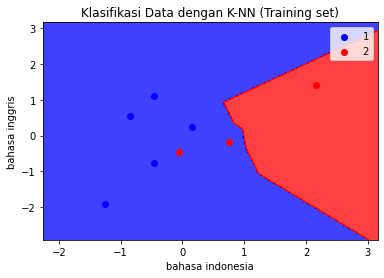

In [7]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                        np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Training set)')
plt.xlabel('bahasa indonesia')
plt.ylabel('bahasa inggris')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


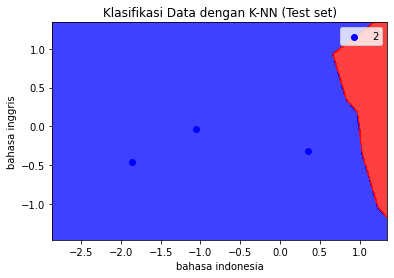

In [8]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Test set)')
plt.xlabel('bahasa indonesia')
plt.ylabel('bahasa inggris')
plt.legend()
plt.show()